### Split post and pre stim data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For creating directories

# Load the data
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'
data = np.load(savename)
amp_data = data['amp_data']  # Amplifier data
stim_data = data['stim_data']  # Stimulation data

# Find the earliest stimulation point across all stim channels
first_stim_onset = np.inf
for i in range(stim_data.shape[0]):  # Assuming stim_data.shape[0] is 8 for stimulation channels
    stim_onset = np.where(stim_data[i] != 0)[0][0] if np.any(stim_data[i] != 0) else np.inf
    if stim_onset < first_stim_onset:
        first_stim_onset = stim_onset

if first_stim_onset == np.inf:
    print("No stimulation point found in the data.")
else:
    print(f"The first stimulation occurred at timepoint index: {first_stim_onset}")

    # Split amp data based on the earliest stim onset
    amp_data_pre_stim = amp_data[:, :first_stim_onset]  # All amp channels up to stimulation
    amp_data_post_stim = amp_data[:, first_stim_onset:]  # All amp channels from stimulation onwards

    # Directory to save the split data
    save_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/pre_post_split/'

    # Ensure the directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Extract the experiment ID from the savename
    experiment_id = savename.split('/')[-1].replace('_all_data.npz', '')

    # Save the pre-stim and post-stim data with the new naming convention
    np.savez(f'{save_dir}neural_data_pre_stim_{experiment_id}.npz', amp_data_pre_stim=amp_data_pre_stim)
    np.savez(f'{save_dir}neural_data_post_stim_{experiment_id}.npz', amp_data_post_stim=amp_data_post_stim)

The first stimulation occurred at timepoint index: 168439


In [3]:
import numpy as np
import os

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'

# Load pre-stimulation and post-stimulation data
pre_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_pre_stim_exp_240213_151732.npz'))
post_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_post_stim_exp_240213_151732.npz'))

# Check if the loaded data is a dictionary or not
if isinstance(pre_stim_data, np.lib.npyio.NpzFile):
    # If it's a dictionary (loaded from a .npz file)
    pre_stim_dict = dict(pre_stim_data)
    post_stim_dict = dict(post_stim_data)

    # Print keys of pre-stimulation data
    print("Keys of pre-stimulation data:")
    print(list(pre_stim_dict.keys()))

    # Print keys of post-stimulation data
    print("\nKeys of post-stimulation data:")
    print(list(post_stim_dict.keys()))

    # Print some rows of pre-stimulation data
    print("\nSome rows of pre-stimulation data:")
    print(pre_stim_dict['amp_data_pre_stim'][:5])  # Print first 5 rows

    # Print some rows of post-stimulation data
    print("\nSome rows of post-stimulation data:")
    print(post_stim_dict['amp_data_post_stim'][:5])  # Print first 5 rows
else:
    # If it's not a dictionary, it's a numpy array
    # Print shape of pre-stimulation data
    print("Shape of pre-stimulation data:", pre_stim_data.shape)

    # Print shape of post-stimulation data
    print("Shape of post-stimulation data:", post_stim_data.shape)


Keys of pre-stimulation data:
['amp_data_pre_stim']

Keys of post-stimulation data:
['amp_data_post_stim']

Some rows of pre-stimulation data:
[[  1.365   0.39   -5.655 ...   1.755  -3.51   -3.12 ]
 [  4.095  -1.755  -0.78  ...  -8.775  -3.51  -12.675]
 [  1.56    2.34    1.17  ...   3.9     2.145  12.87 ]
 [ -7.8    -9.165   3.705 ...   5.655  -4.485  -0.585]
 [ -3.705  -6.045  -9.36  ...  -5.46    5.655   0.195]]

Some rows of post-stimulation data:
[[ 1.936350e+03 -7.995000e+00  1.248000e+01 ... -7.800000e-01
   2.340000e+00  0.000000e+00]
 [ 3.613740e+03 -8.915400e+02  2.476500e+01 ... -6.825000e+00
  -2.535000e+00  5.850000e-01]
 [ 3.534570e+03 -5.937750e+02 -1.111500e+01 ... -1.092000e+01
   3.510000e+00  2.145000e+00]
 [ 1.601145e+03 -9.945000e+00  2.925000e+00 ... -7.410000e+00
   0.000000e+00  1.950000e-01]
 [ 2.086890e+03 -9.750000e+00 -2.145000e+00 ...  4.290000e+00
  -2.145000e+00 -4.485000e+00]]


### Plot to check data 

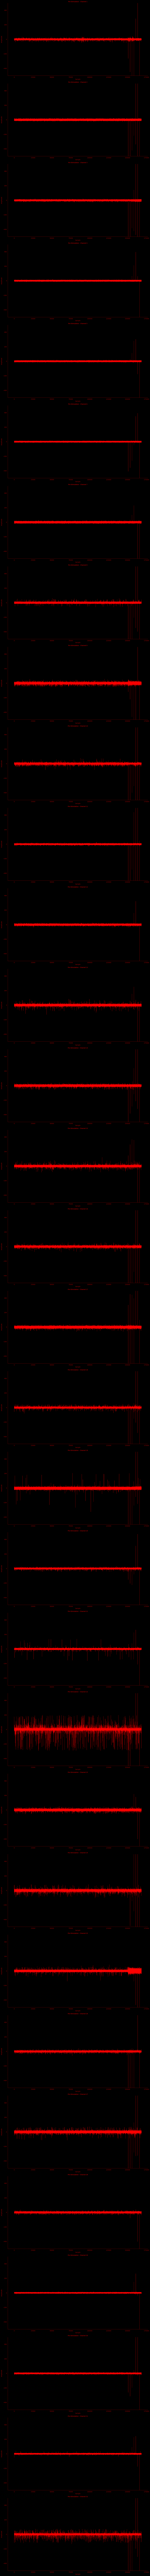

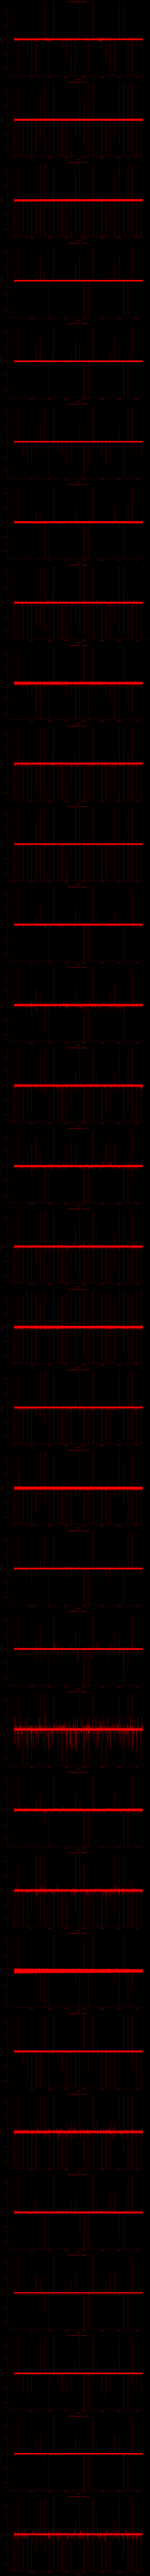

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pre-stimulation and post-stimulation data have been loaded as follows:
# Load the pre-stim and post-stim data from the saved .npz files
pre_stim_data = np.load('/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/pre_post_split/neural_data_pre_stim_exp_240213_151732.npz')['amp_data_pre_stim']
post_stim_data = np.load('/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/pre_post_split/neural_data_post_stim_exp_240213_151732.npz')['amp_data_post_stim']

# Combine the data for sequential plotting
data_sets = [('Pre-Stimulation', pre_stim_data), ('Post-Stimulation', post_stim_data)]

# Loop through each dataset
for title, amp_data in data_sets:
    # Define the number of plots
    n_plots = amp_data.shape[0]

    # Create a figure to hold the subplots
    plt.figure(figsize=(15, 8 * n_plots), facecolor='black')  # Set black background

    # Loop through each channel and create a subplot
    for i in range(n_plots):
        plt.subplot(n_plots, 1, i+1)
        plt.plot(amp_data[i, :], color='red', linewidth=0.5)  # Set plotted data to red
        plt.title(f'{title} - Channel {i+1}', color='red', fontsize=10)  # Set title color to red
        plt.xlabel('Sample', color='red', alpha=0.7)  # Set x-label color to red with less transparency
        plt.ylabel('Amplitude', color='red', alpha=0.7)  # Set y-label color to red with less transparency
        plt.xticks(color='red', alpha=0.7)  # Set x-ticks color to red with less transparency
        plt.yticks(color='red', alpha=0.7)  # Set y-ticks color to red with less transparency
        plt.gca().spines['bottom'].set_color('red')  # Set x-axis color to red
        plt.gca().spines['left'].set_color('red')  # Set y-axis color to red
        plt.gca().spines['bottom'].set_alpha(0.7)  # Set x-axis transparency to be less transparent
        plt.gca().spines['left'].set_alpha(0.7)  # Set y-axis transparency to be less transparent
        plt.gca().set_facecolor('black')  # Set plot background to black
        plt.ylim(-500, 500)  # Set y-axis limits

    plt.tight_layout()
    plt.show()


In [6]:
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments


### Mean Amplitude Comparison

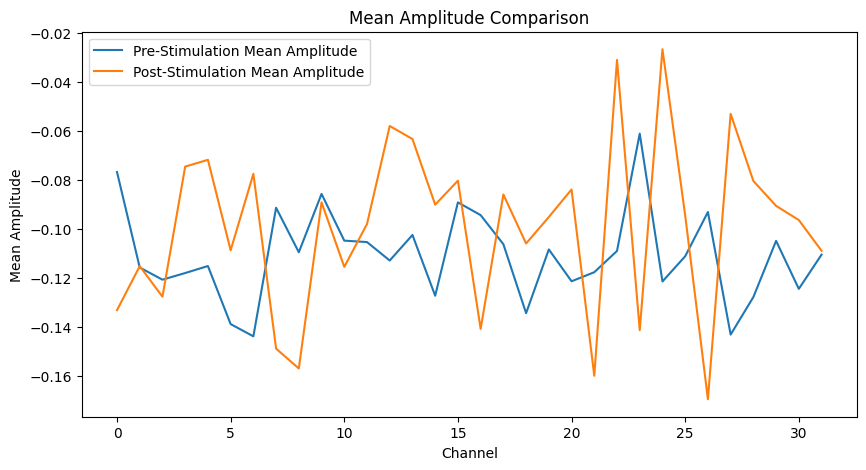

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'
data = np.load(savename)
amp_data = data['amp_data']  # Amplifier data
stim_data = data['stim_data']  # Stimulation data

# Identify first stimulation points and split data
first_stim_points = []
amp_data_pre_stim = []
amp_data_post_stim = []

for i in range(stim_data.shape[0]):  # Assuming stim_data.shape[0] is 8 for stimulation channels
    # Find the first non-zero (assuming zero is no stimulation) in the stim channel
    stim_onset = np.where(stim_data[i] != 0)[0][0] if np.any(stim_data[i] != 0) else -1
    first_stim_points.append(stim_onset)
    
    # Split amp data based on stim_onset
    if stim_onset != -1:  # If there's stimulation
        amp_data_pre_stim.append(amp_data[:, :stim_onset])  # All amp channels up to stimulation
        amp_data_post_stim.append(amp_data[:, stim_onset:])  # All amp channels from stimulation onwards
    else:
        amp_data_pre_stim.append(None)
        amp_data_post_stim.append(None)

# Now, you have:
# - first_stim_points: list of first stimulation points for each stim channel
# - amp_data_pre_stim, amp_data_post_stim: lists of amp data segments before and after first stim

# Example analysis: Compare mean amplitude before and after stimulation for the first stim channel
if first_stim_points[0] != -1:  # Ensure there was a stimulation point
    mean_amp_pre_stim = np.mean(amp_data_pre_stim[0], axis=1)  # Mean across time, for each channel
    mean_amp_post_stim = np.mean(amp_data_post_stim[0], axis=1)  # Mean across time, for each channel

    # Simple comparison plot for the first stimulation channel
    plt.figure(figsize=(10, 5))
    plt.plot(mean_amp_pre_stim, label='Pre-Stimulation Mean Amplitude')
    plt.plot(mean_amp_post_stim, label='Post-Stimulation Mean Amplitude')
    plt.xlabel('Channel')
    plt.ylabel('Mean Amplitude')
    plt.title('Mean Amplitude Comparison')
    plt.legend()
    plt.show()

### Higuchi Fractal Dimension

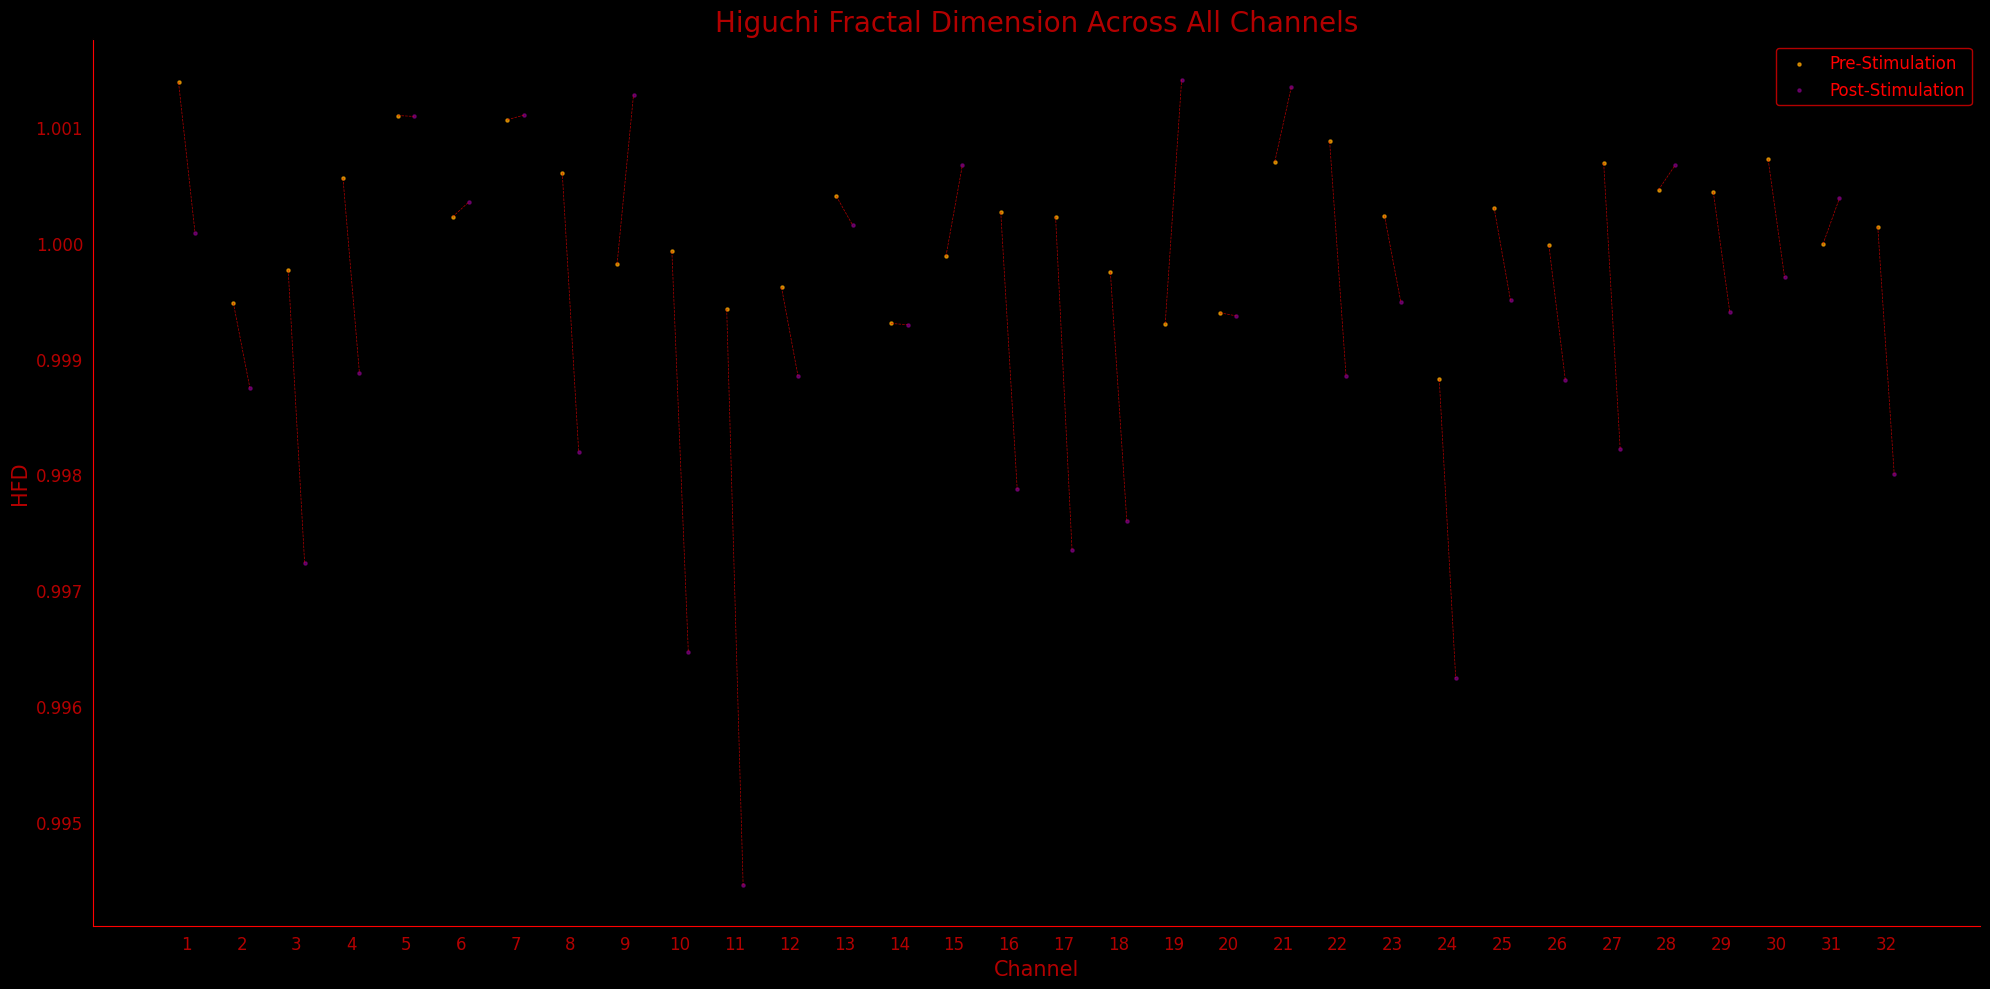

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/experiment_data/exp_240213_151732_all_data.npz'
data = np.load(savename)
amp_data = data['amp_data']  # Amplifier data
stim_data = data['stim_data']  # Stimulation data

# Identify the earliest stimulation point across all stimulation channels
stim_onsets = np.where(stim_data != 0)
if stim_onsets[1].size > 0:  # Check if there are any stimulations
    first_stim_point = np.min(stim_onsets[1])
else:
    first_stim_point = None

# Function to calculate the Higuchi Fractal Dimension (HFD)
def higuchi_fractal_dimension(data, kmax=10):
    L = []
    x = np.arange(1, kmax + 1)
    N = len(data)
    
    for k in range(1, kmax + 1):
        Lk = 0
        for m in range(k):
            lm = np.sum(np.abs(np.diff(data[m::k]))) / ((N - 1) // k) / k
            Lk += lm
        Lk /= k
        L.append(Lk)
    
    L = np.array(L)
    log_n = -np.log(np.divide(x, N, where=x!=0))
    log_L = np.log(L)
    
    hfd, _ = np.polyfit(log_n, log_L, 1)
    return hfd

# Calculate HFD for pre-stimulation and post-stimulation data for each amplifier channel
hfd_pre_stim = []
hfd_post_stim = []

if first_stim_point is not None:
    for channel_data in amp_data:
        pre_stim_data = channel_data[:first_stim_point]
        post_stim_data = channel_data[first_stim_point:]
        
        hfd_pre = higuchi_fractal_dimension(pre_stim_data)
        hfd_post = higuchi_fractal_dimension(post_stim_data)
        
        hfd_pre_stim.append(hfd_pre)
        hfd_post_stim.append(hfd_post)

num_channels = len(hfd_pre_stim)
num_rows = num_channels // 4 if num_channels % 4 == 0 else num_channels // 4 + 1

# Plotting all 32 channels on one plot
plt.figure(figsize=(20, 10), facecolor='black')  # Adjust size and set background color
plt.title('Higuchi Fractal Dimension Across All Channels', color='red', fontsize=20, alpha=0.7)
plt.xlabel('Channel', color='red', fontsize=15, alpha=0.7)
plt.ylabel('HFD', color='red', fontsize=15, alpha=0.7)

# Set the background color of the axes
plt.gca().set_facecolor('black')

# Plot pre-stim and post-stim HFD values for each channel
# Pre-stimulation values
channels = np.arange(1, num_channels + 1)  # Channel numbers
plt.scatter(channels - 0.15, hfd_pre_stim, color='orange', label='Pre-Stimulation', s=5, alpha=0.7)  # Adjust size and transparency
# Post-stimulation values
plt.scatter(channels + 0.15, hfd_post_stim, color='purple', label='Post-Stimulation', s=5, alpha=0.7)  # Adjust size and transparency

# Draw lines connecting pre and post values for better visualization
for i in range(num_channels):
    plt.plot([channels[i] - 0.15, channels[i] + 0.15], [hfd_pre_stim[i], hfd_post_stim[i]], 'r--', linewidth=0.5, alpha=0.7)  # Adjust size and transparency

plt.xticks(channels, color='red', fontsize=12, alpha=0.7)  # Ensure we have a tick for each channel
plt.yticks(color='red', fontsize=12, alpha=0.7)
plt.gca().spines['bottom'].set_color('red')
plt.gca().spines['left'].set_color('red')
legend = plt.legend(facecolor='black', fontsize=12, edgecolor='red')  # Set legend box color
legend.get_frame().set_alpha(0.7)  # Adjust legend box transparency
for text in legend.get_texts():
    text.set_color('red')

plt.tight_layout()
plt.show()


### 2D Phase Space Reconstruction

In [13]:
import multiprocessing
from minepy import MINE
import numpy as np
from sklearn.neighbors import NearestNeighbors
import os
import zipfile
import matplotlib.pyplot as plt

def mutual_info_worker(args):
    data1, data2 = args
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(data1, data2)
    return mine.mic()

def determine_delay(data, max_delay=100, subsample_factor=10):
    subsampled_data = data[::subsample_factor]
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        mi_values = pool.map(mutual_info_worker, [(subsampled_data[:-i], subsampled_data[i:]) for i in range(1, max_delay + 1)])
    return np.argmin(mi_values) + 1

def delay_embedding(data, emb_dim, delay):
    N = len(data)
    return np.array([data[i:i + emb_dim * delay:delay] for i in range(N - (emb_dim - 1) * delay)])

def false_nearest_neighbors(data, emb_dim, delay, R=10):
    N = len(data)
    false_neighbors = np.zeros(emb_dim)
    for d in range(1, emb_dim + 1):
        emb_data = delay_embedding(data, d, delay)
        nbrs = NearestNeighbors(n_neighbors=2).fit(emb_data)
        distances, indices = nbrs.kneighbors(emb_data)
        false_neighbors[d - 1] = np.mean((np.abs(distances[:, 0] - distances[:, 1]) / distances[:, 1]) > R)
    return false_neighbors

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
plots_directory = os.path.join(base_dir, 'experiment_data/phase_space_reconstruction')
embedding_2d_dir = os.path.join(base_dir, '2d_embedding_data')
embedding_3d_dir = os.path.join(base_dir, '3d_embedding_data')

# Load pre-stimulation and post-stimulation data
pre_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_pre_stim_exp_240213_151732.npz'))['amp_data_pre_stim']
post_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_post_stim_exp_240213_151732.npz'))['amp_data_post_stim']

# Ensure directories exist
for dir_path in [embedding_2d_dir, embedding_3d_dir, plots_directory]:
    os.makedirs(dir_path, exist_ok=True)

# Iterate over channels for phase space reconstruction
for i in range(pre_stim_data.shape[0]):
    for label, data in [('Pre', pre_stim_data[i, :]), ('Post', post_stim_data[i, :])]:
        channel_name = f'Channel_{i}_{label}'
        optimal_delay = determine_delay(data, max_delay=20, subsample_factor=10)
        emb_dim_2d, emb_dim_3d = 2, 3

        # Perform delay embedding
        embedded_data_2d = delay_embedding(data, emb_dim_2d, optimal_delay)
        embedded_data_3d = delay_embedding(data, emb_dim_3d, optimal_delay)

        # Save embedded data in appropriate directories
        np.save(os.path.join(embedding_2d_dir, f'2dembedded_{channel_name}.npy'), embedded_data_2d)
        np.save(os.path.join(embedding_3d_dir, f'3dembedded_{channel_name}.npy'), embedded_data_3d)

        # Generate and save 2D plots
        plt.figure(figsize=(8, 6))
        plt.scatter(embedded_data_2d[:, 0], embedded_data_2d[:, 1], s=1)
        plt.title(f'2D Phase Space Reconstruction for {channel_name}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.savefig(os.path.join(plots_directory, f'2D_{channel_name}.png'))
        plt.close()

        # Generate and save 3D plots
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(embedded_data_3d[:, 0], embedded_data_3d[:, 1], embedded_data_3d[:, 2], s=1)
        ax.set_title(f'3D Phase Space Reconstruction for {channel_name}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        plt.savefig(os.path.join(plots_directory, f'3D_{channel_name}.png'))
        plt.close()

# Optional: Zip the embedded data directories
for dir_path, zip_name in [(embedding_2d_dir, '2d_embedded_data.zip'), (embedding_3d_dir, '3d_embedded_data.zip')]:
    with zipfile.ZipFile(os.path.join(base_dir, zip_name), 'w') as zipf:
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            zipf.write(file_path, os.path.relpath(file_path, start=base_dir))

print("All processes completed successfully.")

All processes completed successfully.


In [5]:
import os

embedding_2d_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/2d_embedding_data'

print("Contents of 2d_embedding_data:")
for item in os.listdir(embedding_2d_dir):
    print(item)


Contents of 2d_embedding_data:
2dembedded_Channel_3_Pre.npy
2dembedded_Channel_1_Post.npy
2dembedded_Channel_28_Post.npy
2dembedded_Channel_10_Post.npy
2dembedded_Channel_5_Pre.npy
2dembedded_Channel_19_Pre.npy
2dembedded_Channel_31_Post.npy
2dembedded_Channel_22_Post.npy
2dembedded_Channel_29_Post.npy
2dembedded_Channel_15_Post.npy
2dembedded_Channel_17_Pre.npy
2dembedded_Channel_27_Pre.npy
2dembedded_Channel_8_Post.npy
2dembedded_Channel_7_Post.npy
2dembedded_Channel_2_Pre.npy
2dembedded_Channel_21_Pre.npy
2dembedded_Channel_31_Pre.npy
2dembedded_Channel_16_Post.npy
2dembedded_Channel_10_Pre.npy
2dembedded_Channel_4_Pre.npy
2dembedded_Channel_13_Post.npy
2dembedded_Channel_22_Pre.npy
2dembedded_Channel_16_Pre.npy
2dembedded_Channel_7_Pre.npy
2dembedded_Channel_5_Post.npy
2dembedded_Channel_20_Pre.npy
2dembedded_Channel_11_Post.npy
2dembedded_Channel_30_Post.npy
2dembedded_Channel_25_Pre.npy
2dembedded_Channel_11_Pre.npy
2dembedded_Channel_26_Post.npy
2dembedded_Channel_25_Post.npy
2d

### Elbows for getting an idea for parameters

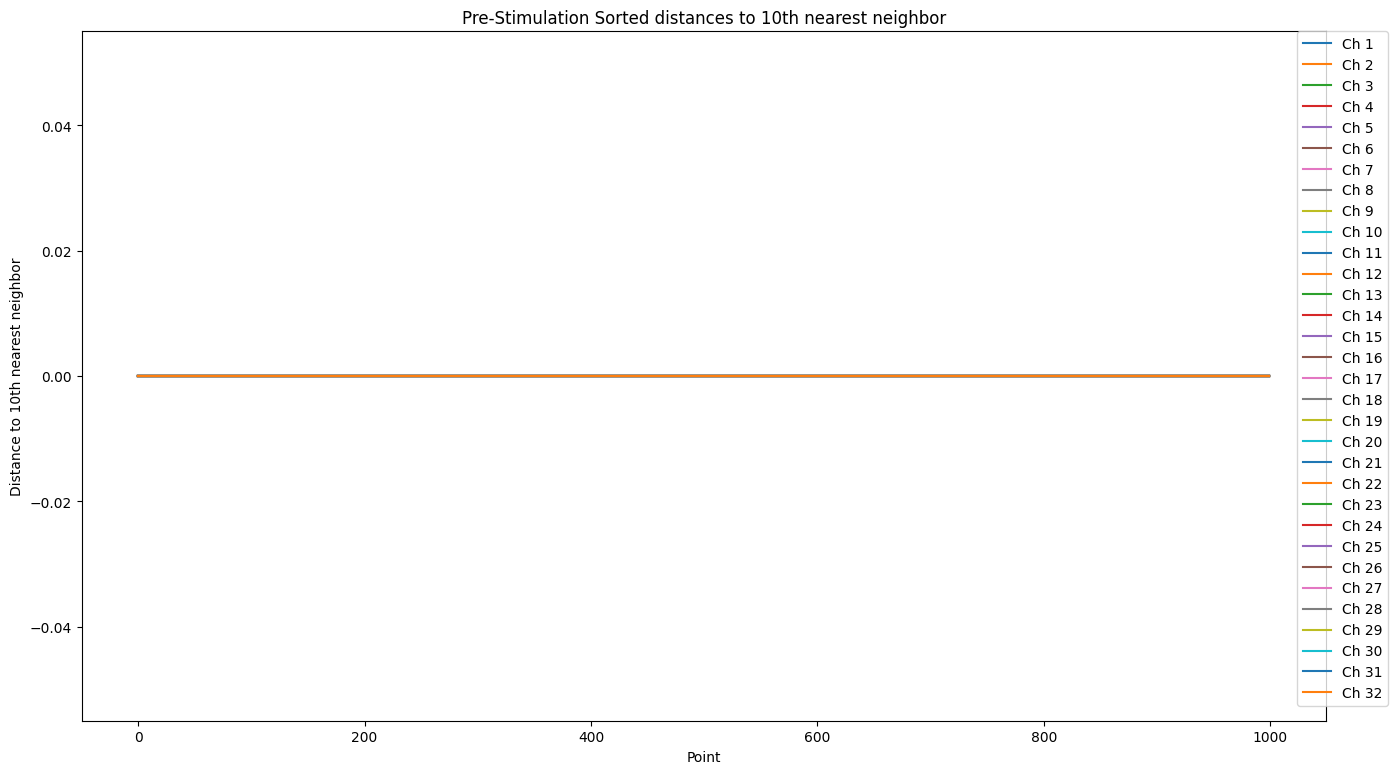

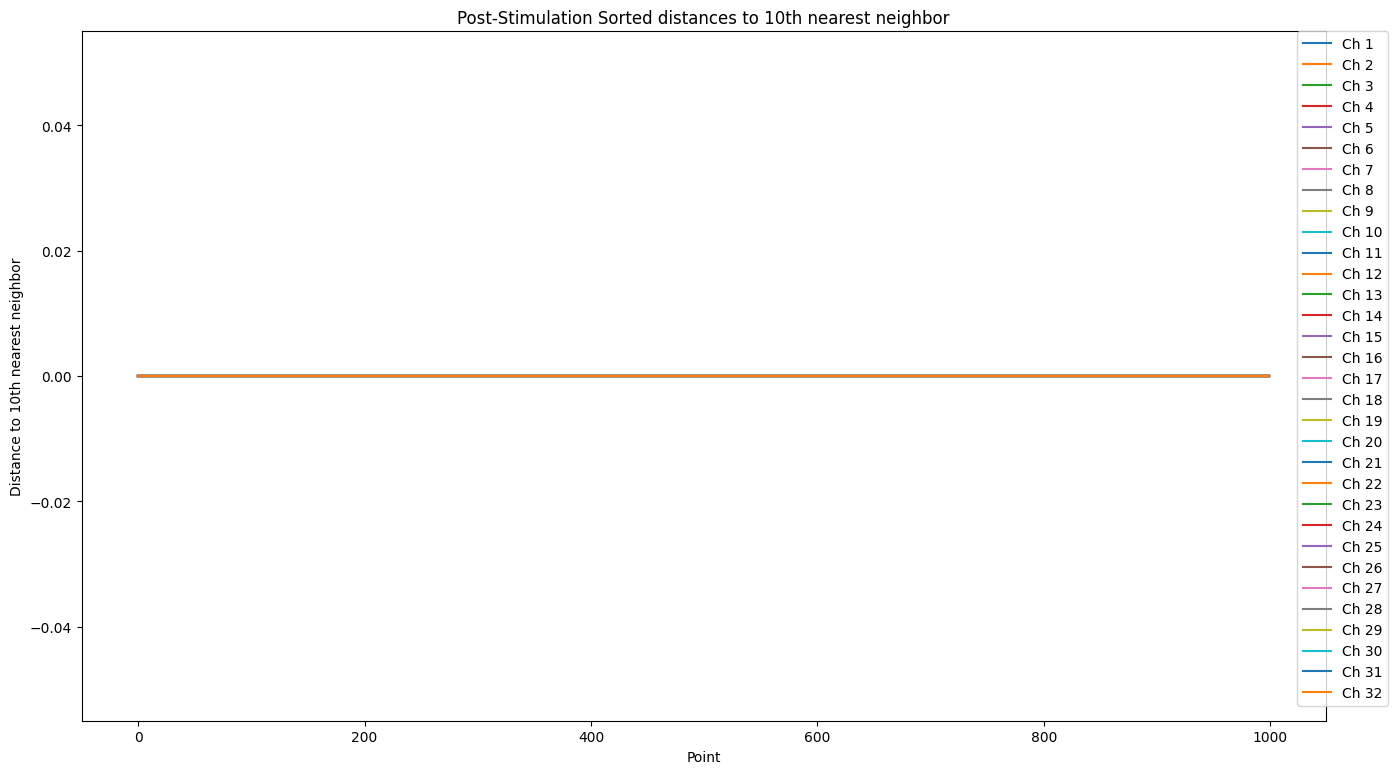

In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'

# Load pre-stimulation and post-stimulation data
pre_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_pre_stim_exp_240213_151732.npz'))['amp_data_pre_stim']
post_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_post_stim_exp_240213_151732.npz'))['amp_data_post_stim']

min_samples = 10  # Define the min_samples value for nearest neighbors analysis

# Function to plot distances for a given dataset
def plot_distances(datasets, title):
    plt.figure(figsize=(14, 8))

    for channel_index in range(32):  # Assuming there are 32 channels
        all_distances = []  # Collect distances for all datasets for this channel

        for dataset in datasets:
            if dataset is not None:  # Check if there's data for this stimulation point
                channel_data = dataset[channel_index, :]  # Get data for the current channel
                
                # Reshape the data to have samples as rows, and features (dummy) as columns
                channel_data_reshaped = channel_data.reshape(-1, 1)
                
                # Compute nearest neighbors
                if channel_data_reshaped.shape[0] > min_samples:  # Ensure enough samples for analysis
                    neighbors = NearestNeighbors(n_neighbors=min_samples).fit(channel_data_reshaped)
                    distances, indices = neighbors.kneighbors(channel_data_reshaped)

                    # Sort and select distances to the min_samples-th nearest neighbor
                    sorted_distances = np.sort(distances[:, min_samples-1])
                    all_distances.append(sorted_distances)

        # If distances were calculated for this channel, plot them
        if all_distances:
            # Flatten the list of arrays into a single array for plotting
            combined_distances = np.concatenate(all_distances)
            
            # Plot the sorted combined distances for the first 1000 points, if there are enough
            plt.plot(combined_distances[:1000], label=f'Ch {channel_index + 1}')

    plt.xlabel('Point')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()


# Plot distances for pre and post stimulation data for each of the 32 channels
plot_distances(pre_stim_data, 'Pre-Stimulation Sorted distances to 10th nearest neighbor')
plot_distances(post_stim_data, 'Post-Stimulation Sorted distances to 10th nearest neighbor')


### UMAP and t-SNE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
plots_dir = os.path.join(base_dir, 'experiment_data/plots')
embeddings_dir = os.path.join(base_dir, 'experiment_data/embeddings')

# Create directories for plots and embeddings if they don't exist
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(embeddings_dir, exist_ok=True)

# Define the UMAP and t-SNE parameters
n_components_umap = 2
n_neighbors_umap = 15
min_dist_umap = 0.1
random_state_umap = 42

n_components_tsne = 2
perplexity_tsne = 30
random_state_tsne = 42

# Function to apply UMAP
def apply_umap(data, n_components, n_neighbors, min_dist, random_state):
    reducer = umap.UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=random_state
    )
    embedding = reducer.fit_transform(data)
    return embedding

# Function to apply t-SNE
def apply_tsne(data, n_components, perplexity, random_state):
    tsne = TSNE(
        n_components=n_components,
        perplexity=perplexity,
        random_state=random_state
    )
    embedding = tsne.fit_transform(data)
    return embedding

# Load pre-stimulation and post-stimulation data
pre_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_pre_stim_exp_240213_151732.npz'))['amp_data_pre_stim']
post_stim_data = np.load(os.path.join(base_dir, 'experiment_data/pre_post_split/neural_data_post_stim_exp_240213_151732.npz'))['amp_data_post_stim']

# Process each dataset separately
for dataset_name, dataset in zip(["pre_stim", "post_stim"], [pre_stim_data, post_stim_data]):
    # Apply UMAP and t-SNE
    umap_embedding = apply_umap(dataset, n_components_umap, n_neighbors_umap, min_dist_umap, random_state_umap)
    tsne_embedding = apply_tsne(dataset, n_components_tsne, perplexity_tsne, random_state_tsne)
    
    # Save the embeddings to .npy files
    np.save(os.path.join(embeddings_dir, f'umap_embedding_{dataset_name}.npy'), umap_embedding)
    np.save(os.path.join(embeddings_dir, f'tsne_embedding_{dataset_name}.npy'), tsne_embedding)
    
    # Create and save UMAP plot
    plt.figure(figsize=(8, 6))
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5)
    plt.title(f'UMAP for {dataset_name}')
    plt.savefig(os.path.join(plots_dir, f'UMAP_{dataset_name}.png'))
    plt.close()  # Close the figure to free up memory
    
    # Create and save t-SNE plot
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=5)
    plt.title(f't-SNE for {dataset_name}')
    plt.savefig(os.path.join(plots_dir, f'tSNE_{dataset_name}.png'))
    plt.close()  # Close the figure to free up memory

### Sample Entropy, Box Counting Dimension

In [ ]:
import numpy as np
import pandas as pd
import os
import hdbscan
import nolds

# Define the base directory for the 2D embedding data
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
embedding_2d_dir = os.path.join(base_dir, '2d_embedding_data')

# Collect results
results = []

def sample_entropy_nolds(u, m=2, r=None):
    if r is None:
        r = 0.2 * np.std(u)
    return nolds.sampen(u, emb_dim=m, tolerance=r)

def correlation_dimension_nolds(data, emb_dim=10):
    # Flatten the data to make it a 1D time series
    data_flattened = data.flatten()
    # Calculate the correlation dimension
    corr_dim = nolds.corr_dim(data_flattened, emb_dim)
    return corr_dim

def analyze_embedded_data_hdbscan(embedded_data_2d, label):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
    clusters = clusterer.fit_predict(embedded_data_2d)
    
    sample_entropy_value = sample_entropy_nolds(embedded_data_2d.flatten())
    
    corr_dim = correlation_dimension_nolds(embedded_data_2d)

    results.append({
        "Label": label,
        "Number of Clusters": len(set(clusters)) - (1 if -1 in clusters else 0),
        "Sample Entropy": sample_entropy_value,
        "Correlation Dimension": corr_dim
    })

# Load and analyze each channel's 2D embedded data
for file_name in os.listdir(embedding_2d_dir):
    if file_name.endswith('.npy'):
        data_path = os.path.join(embedding_2d_dir, file_name)
        embedded_data_2d = np.load(data_path)
        analyze_embedded_data_hdbscan(embedded_data_2d, file_name[:-4])  # Remove '.npy' from label

# Convert results to DataFrame and save as CSV
results_df = pd.DataFrame(results)
csv_path = os.path.join(base_dir, 'analysis_results_2d_delay_embedding.csv')
results_df.to_csv(csv_path, index=False)

print("Analysis completed successfully. Results are saved to:", csv_path)


# Correct the column name for plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].bar(results_df['Label'], results_df['Number of Clusters'])
axs[0].set_title('Number of Clusters per Dataset')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(results_df['Label'], results_df['Sample Entropy'])
axs[1].set_title('Sample Entropy per Dataset')
axs[1].tick_params(axis='x', rotation=90)

axs[2].bar(results_df['Label'], results_df['Correlation Dimension'])
axs[2].set_title('Correlation Dimension per Dataset')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Phase space reconstruction using caos method



In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import multiprocessing
import os
import zipfile
from minepy import MINE

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
embedding_2d_dir = os.path.join(base_dir, '2dembedding_data')
embedding_3d_dir = os.path.join(base_dir, '3dembedding_data')
plots_directory = os.path.join(base_dir, 'plots')

# Load EEG data
EEG_data = np.load(os.path.join(base_dir, 'eeg_data_with_channels.npy'), allow_pickle=True)

# EEG channel names
eeg_channel_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

sampling_rate = 1000  # Hz
start_time, end_time = 805.571, 921.515
start_index, end_index = int(start_time * sampling_rate), int(end_time * sampling_rate)
filtered_EEG_data = EEG_data[start_index:end_index, :]

max_dim = 20

def mutual_info_worker(args):
    data1, data2 = args
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(data1, data2)
    return mine.mic()

def determine_delay(data, max_delay=100, subsample_factor=10):
    subsampled_data = data[::subsample_factor]
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        mi_values = pool.map(mutual_info_worker, [(subsampled_data[:-i], subsampled_data[i:]) for i in range(1, max_delay + 1)])
    return np.argmin(mi_values) + 1

def delay_embedding(data, emb_dim, delay):
    N = len(data)
    return np.array([data[i:i + emb_dim * delay:delay] for i in range(N - (emb_dim - 1) * delay)])

def false_nearest_neighbors(data, emb_dim, delay, R=10):
    N = len(data)
    false_neighbors = np.zeros(emb_dim)
    for d in range(1, emb_dim + 1):
        emb_data = delay_embedding(data, d, delay)
        nbrs = NearestNeighbors(n_neighbors=2).fit(emb_data)
        distances, indices = nbrs.kneighbors(emb_data)
        false_neighbors[d - 1] = np.mean((np.abs(distances[:, 0] - distances[:, 1]) / distances[:, 1]) > R)
    return false_neighbors
    
def caos_method(data, max_dim=20, tau=1):
    def nearest_distance(embedded_data):
        """Compute the nearest distance for each point in the embedded data."""
        min_distances = np.full(len(embedded_data), np.inf)
        for i in range(len(embedded_data)):
            for j in range(len(embedded_data)):
                if i != j:
                    dist = np.sum((embedded_data[i] - embedded_data[j]) ** 2)
                    min_distances[i] = min(min_distances[i], dist)
        return np.sqrt(min_distances)

    def embedding(data, dim, tau):
        """Embeds data according to given dimension and time delay."""
        N = len(data)
        if N - (dim - 1) * tau < 1:
            return None
        embedded_data = np.array([data[i:N - (dim - 1) * tau + i:tau] for i in range(dim)]).T
        return embedded_data

    E1 = np.zeros(max_dim)
    E2 = np.zeros(max_dim - 1)

    for dim in range(1, max_dim + 1):
        embedded_data = embedding(data, dim, tau)
        if embedded_data is None:
            break

        min_distances = nearest_distance(embedded_data)
        if dim < max_dim:
            embedded_data_next = embedding(data, dim + 1, tau)
            min_distances_next = nearest_distance(embedded_data_next)
            E1[dim - 1] = np.mean(min_distances_next / min_distances[:-1])
            if dim > 1:
                E2[dim - 2] = E1[dim - 1] / E1[dim - 2]

    return E1, E2
    
# Analyze each EEG channel using Cao's method and generate plots
for channel_name in eeg_channel_names:
    channel_index = eeg_channel_names.index(channel_name)
    channel_data = filtered_EEG_data[:, channel_index]

    # Assuming optimal_delay is predefined or determined by another method
    optimal_delay = determine_delay(channel_data, max_delay=20, subsample_factor=10)

    # Determine the optimal embedding dimension using Cao's method
    E1, E2 = caos_method(channel_data, max_dim=20, tau=optimal_delay)
    optimal_dim = np.argmax(E2 < 1.05) + 2  # Adjust this criterion based on your analysis

    # Perform embedding with the determined optimal dimension
    embedded_data = delay_embedding(channel_data, emb_dim=optimal_dim, delay=optimal_delay)

    # Save the embedded data
    if optimal_dim == 2:
        np.save(os.path.join(embedding_2d_dir, f'2dembedded_{channel_name}.npy'), embedded_data)
    else:
        np.save(os.path.join(embedding_3d_dir, f'3dembedded_{channel_name}.npy'), embedded_data)

    # Generate and save plot for the optimal embedding
    if emb_dim == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(embedded_data[:, 0], embedded_data[:, 1], s=1)
        plt.title(f'2D Phase Space Reconstruction for {channel_name}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.savefig(os.path.join(plots_directory, f'2D_{channel_name}.png'))
        plt.close()
    elif emb_dim == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], s=1)
        ax.set_title(f'3D Phase Space Reconstruction for {channel_name}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        plt.savefig(os.path.join(plots_directory, f'3D_{channel_name}.png'))
        plt.close()

# Zip the embedded data directories
for dir_path, zip_name in [(embedding_2d_dir, '2d_embedded_data_caos.zip'), (embedding_3d_dir, '3d_embedded_data_caos.zip')]:
    with zipfile.ZipFile(os.path.join(base_dir, zip_name), 'w') as zipf:
        for file in os.listdir(dir_path):
            zipf.write(os.path.join(dir_path, file), file)

print("All processes completed successfully.")

### Topological data analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import cKDTree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gudhi as gd

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
embedding_2d_dir = os.path.join(base_dir, '2d_embedding_data')
persistence_dir = os.path.join(base_dir, 'persistence_diagrams')
betti_plot_dir = os.path.join(base_dir, 'betti_plots')

# Create directories for persistence diagrams and Betti number plots if they don't exist
os.makedirs(persistence_dir, exist_ok=True)
os.makedirs(betti_plot_dir, exist_ok=True)

# List all .npy files in the directory
embedding_files = [file for file in os.listdir(embedding_2d_dir) if file.endswith('.npy')]

def compute_persistence_diagrams(data):
    rips_complex = gd.RipsComplex(points=data, max_edge_length=2)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    return persistence

def plot_persistence_diagrams(persistence):
    gd.plot_persistence_diagram(persistence)
    plt.show()

def calculate_betti_numbers(persistence):
    betti_numbers = {i: 0 for i in range(3)}  # Assuming we're only interested in dimensions 0, 1, and 2
    for interval in persistence:
        if interval[0] < 3:  # Filter out infinite persistence intervals
            betti_numbers[interval[0]] += 1
    return betti_numbers[0], betti_numbers[1], betti_numbers[2]

def plot_betti_numbers(betti_numbers, label):
    plt.bar(range(len(betti_numbers)), list(betti_numbers.values()), tick_label=list(betti_numbers.keys()))
    plt.title(f'Betti Numbers for {label}')
    plt.ylabel('Betti Number')
    plt.xlabel('Dimension')
    plt.savefig(os.path.join(betti_plot_dir, f'Betti_{label}.png'))
    plt.close()

# Define segment length for synthetic labels
segment_length = 1000  # Adjust as needed

# Loop through each .npy file and perform analysis
for file in embedding_files:
    file_path = os.path.join(embedding_2d_dir, file)
    channel_data_2d = np.load(file_path)
    channel_name = file[:-4]  # Removing '.npy' for use in labeling plots and files

    # Compute Persistence Diagrams
    persistence = compute_persistence_diagrams(channel_data_2d)
    
    # Save Persistence Diagrams
    np.save(os.path.join(persistence_dir, f'persistence_{channel_name}.npy'), np.array(persistence))

    # Plot Persistence Diagrams
    plot_persistence_diagrams(persistence)

    # Calculate Betti Numbers
    betti_numbers = calculate_betti_numbers(persistence)
    print(f"Betti Numbers for {channel_name}:", betti_numbers)

    # Plot and save Betti Numbers
    plot_betti_numbers(betti_numbers, channel_name)


    # Assuming `reduced_data_umap` is now your features for machine learning
    X = reduced_data_umap
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(reduced_data_umap, labels, test_size=0.3, random_state=42)

    # Initialize and train the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy for {file}: {accuracy:.2f}")



### Lyapunov Exponents


In [ ]:
import os
import nolds
import numpy as np

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'
embedding_2d_dir = os.path.join(base_dir, '2d_embedding_data')

# List all .npy files in the 2D embedding directory
file_paths = [os.path.join(embedding_2d_dir, file) for file in os.listdir(embedding_2d_dir) if file.endswith('.npy')]

# Calculate the Lyapunov exponent for each file
for file_path in file_paths:
    # Load the embedding data from the file
    data = np.load(file_path)
    
    # Ensure data is in a compatible shape. Here we have 2D data, so we need to handle it accordingly.
    # Since nolds.lyap_e expects a one-dimensional time series, you might consider several approaches:
    # 1. Flattening the data - might not be meaningful for time series analysis
    # 2. Averaging across dimensions - could lose some dynamical information
    # 3. Analyzing each dimension separately - likely the most informative approach
    for i in range(data.shape[1]):  # Iterate over each dimension/column of the 2D data
        try:
            # Calculate the Lyapunov exponent for the current dimension of the data
            lyap_exp = nolds.lyap_e(data[:, i], emb_dim=7, matrix_dim=3)
            print(f"Lyapunov Exponent for {os.path.basename(file_path)} Dimension {i}: {lyap_exp}")
        except ValueError as e:
            print(f"Error processing {os.path.basename(file_path)} Dimension {i}: {e}")


### Lyapunov Exponents v.2


In [ ]:
import os
import nolds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to collect Lyapunov exponent results
lyap_results = []

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
embedding_3d_dir = os.path.join(base_dir, '3dembedding_data')

# List all .npy files in the directory
file_paths = [os.path.join(embedding_3d_dir, file) for file in os.listdir(embedding_3d_dir) if file.endswith('.npy')]

# Calculate the Lyapunov exponent for each file
for file_path in file_paths:
    # Load the embedding data from the file
    data = np.load(file_path)
    
    # Ensure data is in a compatible shape (one-dimensional, for example)
    if data.ndim > 1:
        data = data[:, 0]  # Selecting the first dimension
        
    # Calculate the Lyapunov exponent with adjusted parameters
    try:
        lyap_exp = nolds.lyap_e(data, emb_dim=7, matrix_dim=3)
        # Store the results along with the file name
        lyap_results.append({'File': os.path.basename(file_path), 'Dim1': lyap_exp[0], 'Dim2': lyap_exp[1], 'Dim3': lyap_exp[2]})
    except ValueError as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")

# Convert the list of results to a DataFrame
lyap_exponents_df = pd.DataFrame(lyap_results)

# Define columns for visualization
columns = ['Dim1', 'Dim2', 'Dim3']

# Descriptive Statistics
descriptive_stats = lyap_exponents_df.describe()

# Plotting the distribution
plt.figure(figsize=(12, 6))
for column in columns:
    sns.kdeplot(lyap_exponents_df[column], label=column, shade=True)
plt.title('Distribution of Lyapunov Exponents')
plt.xlabel('Lyapunov Exponent Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Correlation matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(lyap_exponents_df[columns].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Lyapunov Exponents')
plt.show()

plt.figure(figsize=(12, 6))
for column in columns:
    plt.hist(lyap_exponents_df[column], alpha=0.5, label=column, bins=15, density=True)
plt.title('Distribution of Lyapunov Exponents')
plt.xlabel('Lyapunov Exponent Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Re-display the descriptive statistics
print(descriptive_stats)

### Katz Fractal Dimension


In [ ]:
import os
import numpy as np

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
embedding_3d_dir = os.path.join(base_dir, '3dembedding_data')

# List all .npy files in the directory
file_paths = [os.path.join(embedding_3d_dir, file) for file in os.listdir(embedding_3d_dir) if file.endswith('.npy')]

def katz_fd(data):
    # Assuming data is 2D (time x dimensions) or 3D
    if data.ndim > 1:
        # Calculate the Euclidean distance between consecutive points in multi-dimensional space
        distances = np.sqrt(np.sum(np.diff(data, axis=0)**2, axis=1))
        L = np.sum(distances)
        d = np.sqrt(np.sum((data[-1] - data[0])**2))
        FD = np.log10(len(data)) / (np.log10(d) + np.log10(L/d))
        return FD
    else:
        # Fallback for 1-dimensional data
        n = len(data)
        distances = np.abs(np.diff(data))
        L = np.sum(distances)
        d = np.abs(data[-1] - data[0])
        FD = np.log10(n) / (np.log10(d) + np.log10(L/d))
        return FD

# Calculate the Katz Fractal Dimension for each .npy file in your directory
for file_path in file_paths:
    data = np.load(file_path)
    fd = katz_fd(data)
    print(f"Katz Fractal Dimension for {os.path.basename(file_path)}: {fd}")

### Multiscale Entropy


In [ ]:
import os
import numpy as np
import nolds

def coarse_grain(time_series, scale):
    """Create coarse-grained time series."""
    n = len(time_series)
    if n % scale == 0:
        m = n // scale
    else:
        m = n // scale + 1  # ensure that the length of the coarse-grained time series is sufficient
    coarse_ts = np.zeros(m)
    for i in range(m):
        start = i * scale
        end = min(start + scale, n)
        coarse_ts[i] = np.mean(time_series[start:end])
    return coarse_ts

def multiscale_entropy(time_series, max_scale, emb_dim=2, tolerance='default'):
    """Compute multiscale entropy of the given time series."""
    mse = np.zeros(max_scale)
    for scale in range(1, max_scale + 1):
        coarse_ts = coarse_grain(time_series, scale)
        if tolerance == 'default':
            # Set tolerance to 0.1 times the standard deviation of the original time series.
            tolerance = 0.1 * np.std(time_series)
        mse[scale-1] = nolds.sampen(coarse_ts, emb_dim=emb_dim, tolerance=tolerance)
    return mse

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
embedding_3d_dir = os.path.join(base_dir, '3dembedding_data')

# List all .npy files in the directory
file_paths = [os.path.join(embedding_3d_dir, file) for file in os.listdir(embedding_3d_dir) if file.endswith('.npy')]

# Parameters
max_scale = 5  # Maximum scale factor to compute MSE
emb_dim = 2  # Embedding dimension for Sample Entropy

# Calculate MSE for each file and each dimension
for file_path in file_paths:
    data = np.load(file_path)
    print(f"Processing {os.path.basename(file_path)}")
    for dim in range(data.shape[1]):  # Assuming data is of shape (time, dimensions)
        mse = multiscale_entropy(data[:, dim], max_scale, emb_dim)
        print(f"  MSE for dimension {dim+1}: {mse}")

### Multiscale Entropy v.2

In [ ]:
import os
import numpy as np
import nolds
import matplotlib.pyplot as plt
import pandas as pd

def coarse_grain(time_series, scale):
    """Create coarse-grained time series."""
    n = len(time_series)
    if n % scale == 0:
        m = n // scale
    else:
        m = n // scale + 1
    coarse_ts = np.zeros(m)
    for i in range(m):
        start = i * scale
        end = min(start + scale, n)
        coarse_ts[i] = np.mean(time_series[start:end])
    return coarse_ts

def multiscale_entropy(time_series, max_scale, emb_dim=2, tolerance='default'):
    """Compute multiscale entropy of the given time series."""
    mse = np.zeros(max_scale)
    for scale in range(1, max_scale + 1):
        coarse_ts = coarse_grain(time_series, scale)
        if tolerance == 'default':
            tolerance = 0.1 * np.std(time_series)
        mse[scale-1] = nolds.sampen(coarse_ts, emb_dim=emb_dim, tolerance=tolerance)
    return mse

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
embedding_3d_dir = os.path.join(base_dir, '3dembedding_data')

# List all .npy files in the directory
file_paths = [os.path.join(embedding_3d_dir, file) for file in os.listdir(embedding_3d_dir) if file.endswith('.npy')]

# Parameters
max_scale = 5
emb_dim = 2

# Collecting MSE results
mse_results = {}

for file_path in file_paths:
    data = np.load(file_path)
    file_name = os.path.basename(file_path)
    print(f"Processing {file_name}")
    for dim in range(data.shape[1]):  # Assuming data is of shape (time, dimensions)
        mse = multiscale_entropy(data[:, dim], max_scale, emb_dim)
        mse_results[f"{file_name}_Dim{dim+1}"] = mse
        print(f"  MSE for dimension {dim+1}: {mse}")

# Plotting MSE results
n_files = len(mse_results)
fig, axs = plt.subplots(n_files, 1, figsize=(10, 5*n_files), squeeze=False)
for i, (key, mse_values) in enumerate(mse_results.items()):
    scales = range(1, max_scale + 1)
    axs[i, 0].plot(scales, mse_values, marker='o', linestyle='-')
    axs[i, 0].set_title(f'Multiscale Entropy for {key}')
    axs[i, 0].set_xlabel('Scale Factor')
    axs[i, 0].set_ylabel('Sample Entropy')
    axs[i, 0].grid(True)

plt.tight_layout()
plt.show()

# Optionally, save MSE results to a CSV file
mse_df = pd.DataFrame.from_dict(mse_results, orient='index')
mse_df.to_csv('/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net/mse_results.csv')

### Wavelet-Based Fractal Analysis

In [ ]:
import numpy as np
import pywt
import os

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
EEG_data_path = os.path.join(base_dir, 'eeg_data_with_channels.npy')
EEG_data = np.load(EEG_data_path, allow_pickle=True)

# EEG channel names
eeg_channel_names = [
    'Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7',
    'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2'
]

sampling_rate = 1000  # Hz
start_time, end_time = 805.571, 921.515 # Data without stimulation occuring
start_index, end_index = int(start_time * sampling_rate), int(end_time * sampling_rate)
filtered_EEG_data = EEG_data[start_index:end_index, :]

# Function to estimate Hurst exponent from wavelet coefficients
def estimate_hurst_exponent(coeffs):
    levels = len(coeffs) - 1
    n = np.array([2 ** i for i in range(1, levels + 1)])
    S = np.array([np.std(coeffs[i], ddof=1) for i in range(1, levels + 1)])
    coeffs = np.polyfit(np.log2(n), np.log2(S), 1)
    hurst = coeffs[0]
    return hurst

# Function for wavelet-based fractal analysis on a single channel
def wavelet_fractal_analysis(signal, wavelet='db4'):
    coeffs = pywt.wavedec(signal, wavelet)
    hurst_exponent = estimate_hurst_exponent(coeffs)
    return hurst_exponent

# Calculate and store Hurst exponent for each channel
hurst_exponents = np.zeros(len(eeg_channel_names))
for i, channel in enumerate(eeg_channel_names):
    signal = EEG_data[:, i]
    hurst_exponents[i] = wavelet_fractal_analysis(signal)
    print(f"Hurst exponent for {channel}: {hurst_exponents[i]}")


In [ ]:
import numpy as np
from scipy.special import lambertw

# Define parameters (example values, please replace with your actual parameters)
epsilon = 1  # Delay factor (1/v where v is the velocity of propagation)
r = 2        # Parameter from the kernel function φ(x,r)

# Define a range of wave numbers k to analyze
k_values = np.linspace(-10, 10, 400)  # Replace with the appropriate range for your analysis

# Function to compute the Fourier transform of the kernel function, H(k, σ)
def H_tilde(k, sigma):
    Q1 = 4 * (np.pi * k) ** 2 - r ** 2 + epsilon ** 2 * sigma ** 2
    Q2 = 4 * (np.pi * k) ** 2 + r ** 2 - epsilon ** 2 * sigma ** 2
    return np.exp(-epsilon * sigma) * np.exp(-r * r) * (
        epsilon * sigma * np.exp(epsilon * sigma) * Q1 + r * np.exp(r) * (
            Q2 * np.cos(2 * np.pi * k) + 4 * epsilon * np.pi * k * sigma * np.sin(2 * np.pi * k)
        )
    ) / ((4 * (np.pi * k) ** 2 + r ** 2) ** 2 + 2 * epsilon ** 2 * (4 * (np.pi * k) ** 2 - r ** 2) * sigma ** 2 + epsilon ** 4 * sigma ** 4)

# Initialize array to hold the computed σ values for each k
sigma_values = np.zeros_like(k_values, dtype=np.complex128)

# Compute the spectrum σ(k) for each k
for i, k in enumerate(k_values):
    # Define the right-hand side of Eq. (20)
    R = H_tilde(k, sigma_values[i-1] if i > 0 else 0) * epsilon * np.exp(epsilon)
    
    # Solve for σ using the Lambert W function
    sigma_values[i] = lambertw(R) / epsilon - 1

# Plotting the spectrum (requires matplotlib, uncomment the following lines if you have matplotlib installed)
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, sigma_values.real, label='Real part of σ')
# plt.plot(k_values, sigma_values.imag, label='Imaginary part of σ')
# plt.xlabel('Wave number k')
# plt.ylabel('σ')
# plt.title('Spectrum of σ(k)')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
import numpy as np

# Define the kernel function φ and the firing rate function F
def phi(x):
    # Placeholder for the actual function, e.g., Gaussian kernel
    return np.exp(-x**2)

def F(u):
    # Placeholder for the firing rate function
    return 1 / (1 + np.exp(-u))

# Define constants and setup grid
v = 1.0        # Propagation velocity
epsilon = 1/v  # Delay factor
t_max = 10     # Total time for simulation
x_max = 10     # Spatial extent
dx = 0.1       # Spatial resolution
dt = 0.1       # Time resolution
Nx = int(x_max / dx)  # Number of spatial points
Nt = int(t_max / dt)  # Number of time points

# Initialize the solution array with initial condition
u = np.zeros((Nx, Nt))

# Assume u[:, 0] is filled with initial conditions for t = 0

# Time integration using Euler's method
for t in range(1, Nt):
    for x in range(Nx):
        # Discretize space for the integral
        integral_sum = 0
        for y in range(Nx):
            # Calculate the delayed time index
            delayed_time_index = int(t - epsilon * np.abs(x*dx - y*dx) / dt)
            delayed_time_index = max(delayed_time_index, 0)
            
            # Add the contribution of the integral at this point
            integral_sum += phi((x-y)*dx) * F(u[y, delayed_time_index]) * dx
        
        # Update the value of u at this point using the Amari equation
        u[x, t] = dt * integral_sum + u[x, t-1]  # This assumes u_t + u = integral, modify accordingly

# u now contains the solution to the Amari equation over the grid


In [ ]:
v

In [ ]:
live:
detect_peak_heights, calculate_variance_std_dev, calculate_rms, detect_peaks, freq_bands, calculate_spectral_entropy, spectral_centroids, spectral_edge_density, phase_synchronization, calculate_higuchi_fractal_dimension, calculate_zero_crossing_rate, perform_empirical_mode_decomposition, time_warping_factor, evolution_rate




nighly:
arnold_tongues, multifractal_detrended_fluctation, phase_space, recurrence_quantification, welchsPSD, STFT, coherence, freq_max_power, continuous_wavelet_transform, transfer_entropy, joint_entropy, von_neumann_entropy, shannon_entropy, relative_entropy, choi_williams_distribution, moving_average, signal_variance, hilbert_transform, hermitian_matrices, evolved_states, symbolic_dynamics, hilber_huang_transformm, phase_amplitude_coupling, ganger_causality, dynamic_time_warping, 

Dynamical Systems Analysis

Correlation Dimension

Poincaré Maps

Stable States

Transition Dynamics

State Estimation

Vector Field Reconstruction

Differential Equations

Cluster analysis to group files or conditions with similar Lyapunov exponent profile

statistical tests to compare the distributions of Lyapunov exponents across different conditions or groups


Approximate Entropy

Local Fractal Dimension

Fractal Dimension of Network Connectivity

### Hamiltonian Matrix Construction

In [ ]:
import numpy as np
import os
from numpy.fft import fft
import matplotlib.pyplot as plt

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
EEG_data_path = os.path.join(base_dir, 'eeg_data_with_channels.npy')
EEG_data = np.load(EEG_data_path, allow_pickle=True)

sampling_rate = 1000  # Hz (adjust if necessary)
start_time, end_time = 805.571, 921.515  # Data without stimulation occurring
start_index, end_index = int(start_time * sampling_rate), int(end_time * sampling_rate)
EEG_data = EEG_data[start_index:end_index, :]

# EEG channel names
eeg_channel_names = [
    'Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7',
    'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2'
]

def calculate_energy_features(EEG_signal):
    kinetic_energy = np.sum(np.diff(EEG_signal) ** 2) / len(EEG_signal)
    potential_energy = np.sum(EEG_signal ** 2) / len(EEG_signal)
    freq_content = np.abs(fft(EEG_signal)) ** 2
    return kinetic_energy, potential_energy, freq_content.mean()

def calculate_temporal_symmetry(signal):
    """
    Calculate the temporal symmetry of a signal by comparing it to its time-reversed version.
    
    Args:
    - signal (np.ndarray): The signal to analyze.
    
    Returns:
    - symmetry_score (float): A score representing the degree of temporal symmetry.
    """
    time_reversed_signal = signal[::-1]  # Reverse the signal
    symmetry_score = np.corrcoef(signal, time_reversed_signal)[0, 1]  # Calculate correlation between signal and its reversal
    return symmetry_score

# Define symmetric channel pairs based on the EEG electrode layout
channel_pairs = [('F3', 'F4'), ('T7', 'T8'), ('C3', 'C4'), ('P3', 'P4'), ('O1', 'O2')]
channel_indices_pairs = [(eeg_channel_names.index(pair[0]), eeg_channel_names.index(pair[1])) for pair in channel_pairs]

num_channels = EEG_data.shape[1] 
H = np.zeros((num_channels, num_channels))

# Adjust diagonal elements for temporal symmetry
for i in range(num_channels):
    signal = EEG_data[i]
    autocorr = np.correlate(signal, signal, mode='full')[-signal.size:]
    temporal_symmetry_metric = np.max(autocorr)
    H[i, i] += temporal_symmetry_metric  # Adding temporal symmetry to initial values

# Calculate diagonal elements: energy features + temporal symmetry for each channel
for i in range(num_channels):
    signal = EEG_data[:, i]  # Correct extraction of channel data
    kinetic, potential, freq_mean = calculate_energy_features(signal)
    temporal_symmetry = calculate_temporal_symmetry(signal)  # Calculate temporal symmetry score
    # Incorporate temporal symmetry into the Hamiltonian matrix.
    # You might directly add the score or scale it appropriately.
    H[i, i] = kinetic + potential + freq_mean + temporal_symmetry

# Off-diagonal elements: based on correlations, including bilateral symmetry
correlation_matrix = np.corrcoef(EEG_data.T)  # Correctly compute correlations between channels

# Bilateral symmetry adjustments
for i, j in channel_indices_pairs:
    H[i, j] = H[j, i] = correlation_matrix[i, j]

for i in range(num_channels):
    for j in range(num_channels):
        if i != j:  # Avoid diagonal; already calculated
            H[i, j] = correlation_matrix[i, j]  # Populate with correlation values

# Print basic statistics of the Hamiltonian matrix
print("Hamiltonian Matrix Basic Statistics:")
print(f"Minimum Value: {np.min(H)}")
print(f"Maximum Value: {np.max(H)}")
print(f"Average Value: {np.mean(H)}")

# Define the save path
save_path = os.path.join(base_dir, 'Hamiltonian_Matrix.npy')
# Save the Hamiltonian matrix
np.save(save_path, H)
print(f"Hamiltonian matrix saved to {save_path}")

def normalize_to_range(values, new_min=0, new_max=1):
    """
    Normalize an array of values to a new range [new_min, new_max].
    """
    min_val = np.min(values)
    max_val = np.max(values)
    scaled_values = (values - min_val) / (max_val - min_val)
    return new_min + scaled_values * (new_max - new_min)

# Calculate the upper triangular indices once, excluding the diagonal
tri_u_indices = np.triu_indices(num_channels, k=1)

for i in range(num_channels):
    signal = EEG_data[:, i]
    kinetic, potential, freq_mean = calculate_energy_features(signal)
    kinetic_normalized = normalize_to_range(np.array([kinetic]))
    potential_normalized = normalize_to_range(np.array([potential]))
    freq_mean_normalized = normalize_to_range(np.array([freq_mean]))
    temporal_symmetry = calculate_temporal_symmetry(signal)
    temporal_symmetry_normalized = normalize_to_range(np.array([temporal_symmetry]), -1, 1)

    # Combine the normalized metrics
    H[i, i] = kinetic_normalized[0] + potential_normalized[0] + freq_mean_normalized[0] + temporal_symmetry_normalized[0]

# Normalize the off-diagonal elements
off_diagonal_elements = correlation_matrix[tri_u_indices]
normalized_off_diagonal = normalize_to_range(off_diagonal_elements, -1, 1)

# Assign the normalized values back to the off-diagonal elements in H
for index, value in enumerate(normalized_off_diagonal):
    x, y = tri_u_indices[0][index], tri_u_indices[1][index]
    H[x, y] = H[y, x] = value

# Visualize the Hamiltonian matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.title("Hamiltonian Matrix Heatmap")
plt.imshow(H, cmap='viridis', aspect='auto')
plt.colorbar(label='Interaction Strength')
plt.xlabel("EEG Channel Index")
plt.ylabel("EEG Channel Index")
plt.tight_layout()
plt.show()

### Quantum Analysis using Hermitian Matrices and Quantum Metrics

In [ ]:
import numpy as np
import os
import h5py
from numpy.linalg import eigh
from scipy.sparse.linalg import eigs 
from scipy.linalg import sqrtm

# Define directories
base_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net'
EEG_data_path = os.path.join(base_dir, 'eeg_data_with_channels.npy')
EEG_data = np.load(EEG_data_path, allow_pickle=True)

sampling_rate = 1000  # Hz (adjust if necessary)
start_time, end_time = 805.571, 921.515  # Data without stimulation occurring
start_index, end_index = int(start_time * sampling_rate), int(end_time * sampling_rate)
EEG_data = EEG_data[start_index:end_index, :]

# EEG channel names
eeg_channel_names = [
    'Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7',
    'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2'
]

def calculate_spectral_gap(H):
    if H.shape[0] <= 100:  # Adjust this threshold as appropriate
        eigenvalues, _ = eigh(H)
        spectral_gap = np.abs(eigenvalues[1] - eigenvalues[0])
    else:
            # For larger matrices, use eigs to compute the two smallest eigenvalues
        eigenvalues, _ = eigs(H, k=2, which='SR')
        spectral_gap = np.abs(np.diff(np.sort(eigenvalues.real)))[0]  # Sort to ensure they are in ascending order
    return spectral_gap.real

def calculate_localization_length(eigenvectors):
    IPR_values = np.sum(np.abs(eigenvectors)**4, axis=0)
    localization_length = 1 / IPR_values
    return localization_length

# Assuming eigenvectors are obtained from the same Hamiltonian H
_, eigenvectors = np.linalg.eigh(H)  # For full matrices, use np.linalg.eigh

localization_length = calculate_localization_length(eigenvectors)

def purity(density_matrix):
    return np.trace(np.dot(density_matrix, density_matrix))

def von_neumann_entropy(density_matrix):
    eigenvalues = np.linalg.eigvalsh(density_matrix)
    entropy = -np.sum(eigenvalues * np.log(eigenvalues + np.finfo(float).eps))  # Adding epsilon to avoid log(0)
    return entropy

def linear_entropy(density_matrix):
    d = density_matrix.shape[0]  # Dimension of the density matrix
    purity = np.trace(np.dot(density_matrix, density_matrix))
    entropy = (d / (d - 1)) * (1 - purity)
    return entropy

def create_density_matrix(EEG_data):
    correlation_matrix = np.corrcoef(EEG_data.T)
    # Ensure the matrix is Hermitian and positive semi-definite
    eigenvalues, eigenvectors = eigh(correlation_matrix)
    eigenvalues[eigenvalues < 0] = 0
    density_matrix = eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors)
    return density_matrix

def construct_hermitian_matrix(signal1, signal2):
    """
    Construct a Hermitian matrix based on two signals.
    This example simply uses the outer product for demonstration.
    """
    matrix = np.outer(signal1, signal2.conjugate())
    return matrix + matrix.T.conj()

def participation_ratio(density_matrix):
    """Calculate the Participation Ratio of the density matrix."""
    p = purity(density_matrix)
    d = density_matrix.shape[0]
    return d * p

def fidelity(density_matrix1, density_matrix2):
    """
    Calculate the Fidelity between two density matrices.
    Fidelity is a measure of similarity between two quantum states.
    """
    sqrt_rho = sqrtm(density_matrix1)
    product_matrix = np.dot(sqrt_rho, np.dot(density_matrix2, sqrt_rho))
    sqrt_product = sqrtm(product_matrix)
    return np.trace(sqrt_product) ** 2

# Calculate correlation matrix for EEG data
correlation_matrix = np.corrcoef(EEG_data.T)  # Transpose to get channels as features

# Function to calculate concurrence for a 2x2 matrix
def calculate_concurrence(rho):
    # The input rho is expected to be a 2x2 correlation matrix for this simplified example
    # Compute the concurrence using a simplified approach adapted for correlation matrices
    eigenvalues = np.linalg.eigvals(rho)
    sqrt_eigenvalues = np.sqrt(np.abs(eigenvalues))
    sorted_sqrt_eigenvalues = np.sort(sqrt_eigenvalues)[::-1]
    concurrence = max(0, sorted_sqrt_eigenvalues[0] - np.sum(sorted_sqrt_eigenvalues[1:]))
    return concurrence

# Calculate pairwise concurrence
n_channels = EEG_data.shape[1]
pairwise_concurrence = np.zeros((n_channels, n_channels))

for i in range(n_channels):
    for j in range(i+1, n_channels):
        # Construct a "density matrix" from correlations for simplicity
        rho = np.array([
            [1, correlation_matrix[i, j]],
            [correlation_matrix[j, i], 1]
        ])
        concurrence = calculate_concurrence(rho)
        pairwise_concurrence[i, j] = concurrence
        pairwise_concurrence[j, i] = concurrence  # Symmetric

# The pairwise_concurrence matrix now contains the simplified concurrence values for each channel pair
pairwise_concurrence[:5, :5]  # Display a subset of the results for brevity

def analyze(signals, output_path):
    num_channels = signals.shape[1]
    # Assuming we're storing one value per channel pair, for simplicity
    num_pairs = num_channels * (num_channels - 1) // 2
    
    # Open or create the HDF5 file
    with h5py.File(output_path, 'w') as f:
           # Create datasets in the HDF5 file to store results for all metrics
        dset_eigenvalues = f.create_dataset('eigenvalues', (num_channels * (num_channels - 1) // 2, signals.shape[0]), dtype='float64')
        dset_density_diagonal = f.create_dataset('density_diagonal', (num_channels * (num_channels - 1) // 2, signals.shape[0]), dtype='float64')
        dset_concurrence = f.create_dataset('concurrence', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_spectral_gap = f.create_dataset('spectral_gap', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_localization_length = f.create_dataset('localization_length', (num_channels * (num_channels - 1) // 2, signals.shape[0]), dtype='float64')
        dset_vn_entropy = f.create_dataset('vn_entropy', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_lin_entropy = f.create_dataset('lin_entropy', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_purity = f.create_dataset('purity', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_participation_ratio = f.create_dataset('participation_ratio', (num_channels * (num_channels - 1) // 2,), dtype='float64')
        dset_fidelity = f.create_dataset('fidelity', (num_channels * (num_channels - 1) // 2,), dtype='float64')  # Note: Fidelity requires comparisons

        result_index = 0
        for i in range(num_channels):
            for j in range(i+1, num_channels):
                hermitian_matrix = construct_hermitian_matrix(connectivity_matrix)
                eigenvalues, eigenvectors = np.linalg.eigh(hermitian_matrix)
                
                # Reconstruct the density matrix to extract the density diagonal and compute metrics
                density_matrix = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T.conj()
                density_diagonal = np.diag(density_matrix).real
                 
                # Calculating each metric
                vn_entropy = von_neumann_entropy(density_matrix)
                lin_entropy = linear_entropy(density_matrix)
                purity_val = purity(density_matrix)
                participation_ratio_val = participation_ratio(density_matrix)  # Assuming definition includes calculation from purity
                concurrence_val = calculate_concurrence(density_matrix)
                spectral_gap_val = calculate_spectral_gap(hermitian_matrix)  # Adapt as necessary
                localization_length_val = calculate_localization_length(eigenvectors)  # Adapt as necessary

                # For fidelity, comparing density_matrix with itself as an example; adjust as needed
                fidelity_val = fidelity(density_matrix, density_matrix)
                
                # Store results in the HDF5 file
                dset_eigenvalues[result_index, :] = eigenvalues
                dset_density_diagonal[result_index, :] = density_diagonal
                dset_concurrence[result_index] = concurrence_val
                dset_spectral_gap[result_index] = spectral_gap_val
                dset_localization_length[result_index, :] = localization_length_val
                dset_vn_entropy[result_index] = vn_entropy
                dset_lin_entropy[result_index] = lin_entropy
                dset_purity[result_index] = purity_val
                dset_participation_ratio[result_index] = participation_ratio_val
                dset_fidelity[result_index] = fidelity_val

                result_index += 1

analyze(EEG_data, '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net/quantum.hdf5')

### Quantum Metrics

In [ ]:
import matplotlib.pyplot as plt
import h5py

output_path = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/EEG_Chaos_Kuramoto_Neural_Net/Quantum/quantum.hdf5'

with h5py.File(output_path, 'r') as f:
    # Assuming you want to print the last set of results
    concurrence_val = f['concurrence'][-1]
    spectral_gap_val = f['spectral_gap'][-1]
    localization_length_val = f['localization_length'][-1, :]
    vn_entropy_val = f['vn_entropy'][-1]
    lin_entropy_val = f['lin_entropy'][-1]
    purity_val = f['purity'][-1]
    participation_ratio_val = f['participation_ratio'][-1]
    fidelity_val = f['fidelity'][-1]  # This example uses the last comparison; adjust as needed

    print("Purity:", purity_val)
    print("Participation Ratio:", participation_ratio_val)
    print("Fidelity (with itself):", fidelity_val)
    print("Linear Entropy:", lin_entropy_val)
    print("Von Neumann Entropy:", vn_entropy_val)
    print("Concurrence:", concurrence_val)
    print("Spectral Gap:", spectral_gap_val)
    print("Localization Lengths:", localization_length_val)

# Plotting the Spectral Gap for all pairs
with h5py.File(output_path, 'r') as f:
    spectral_gap_vals = f['spectral_gap'][:]

plt.figure(figsize=(10, 6))
plt.plot(spectral_gap_vals, marker='o', linestyle='-', color='b')
plt.title('Spectral Gap for EEG Signal Pairs')
plt.xlabel('Signal Pair Index')
plt.ylabel('Spectral Gap Value')
plt.grid(True)
plt.show()

### Quantum-Inspired Connectivity Analysis and Measurement

In [ ]:
# Extend analyze_connectivity to include entanglement measures
def analyze_connectivity_with_entanglement(signals):
    connectivity_info = analyze_connectivity(signals)  # Use existing function
    
    for info in connectivity_info:
        density_matrix = info['density_matrix']  # Assume this is added to info in analyze_connectivity
        concurrence = calculate_concurrence(density_matrix)
        info['concurrence'] = concurrence  # Add entanglement measure
    
    return connectivity_info
    
# Quantum-inspired Measurement
def quantum_like_measurement(density_matrix, operator):
    measurement_result = np.trace(operator @ density_matrix)
    return measurement_result.real

# Example usage
density_matrix = create_density_matrix(EEG_data)
operator = np.eye(density_matrix.shape[0])  # Example operator
measurement_result = quantum_like_measurement(density_matrix, operator)
print("Quantum-like Measurement Result:", measurement_result)
# Load EEG data
EEG_data_path = os.path.join(base_dir, 'eeg_data_with_channels.npy')
EEG_data = np.load(EEG_data_path, allow_pickle=True)

# Assuming EEG_data's shape is (n_samples, n_channels)
# Analyze the connectivity
connectivity_info = analyze(EEG_data)

# Process the connectivity information as needed
for info in connectivity_info:
    print(f"Channels: {info['channels']}, Eigenvalues: {info['eigenvalues'][:5]}, Density Diagonal: {info['density_diagonal'][:5]}")

In [ ]:
# Z-score normalization
EEG_data_zscored = (EEG_data - EEG_data.mean(axis=0)) / EEG_data.std(axis=0)

# Discretize the signal into ternary states based on defined thresholds
def discretize_signal(signal, thresholds=(-0.5, 0.5)):
    """
    Discretize a signal into -1, 0, +1 based on given thresholds.
    
    Args:
    - signal (np.ndarray): The signal to discretize.
    - thresholds (tuple): A tuple of two floats defining the threshold for the neutral state.
    
    Returns:
    - discretized_signal (np.ndarray): The discretized signal.
    """
    discretized_signal = np.zeros_like(signal)
    discretized_signal[signal <= thresholds[0]] = -1  # Negative state
    discretized_signal[signal >= thresholds[1]] = 1   # Positive state
    # Neutral state is already set to 0 by default
    return discretized_signal

# Apply discretization to all EEG channels
EEG_data_discretized = np.array([discretize_signal(channel) for channel in EEG_data_zscored.T]).T


### Spectrum Analysis and Response Surface Visualization for the Amari Neural Field Equation

In [ ]:
import numpy as np
from scipy.optimize import fsolve
from scipy.special import lambertw
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
epsilon = 1  # example value, needs to be adjusted according to specific case
r = 20  # example value, adjust this as needed

# Define the function R(k,r,σ) which is the right-hand side of Eq. (20)
def R(k, r, sigma):
    # This is an example function representing R, the actual definition of R should come from the right-hand side of Eq. (20)
    # The example below is a placeholder and needs to be replaced with the actual expression
    return np.exp(epsilon * sigma) * np.cos(2 * np.pi * k)

# Define the dispersion relation function according to Eq. (21)
def dispersion_relation(k, r, branch):
    # Calculate the right-hand side of Eq. (21)
    rhs = R(k, r, branch)
    # Compute the Lambert W function for the given branch
    lambert_term = lambertw(rhs, k=branch)
    # Calculate the spectral value sigma using Eq. (21)
    sigma = (1/epsilon) * lambert_term - 1
    return sigma.real

# Range of k values to compute the spectrum over
k_values = np.linspace(-3, 3, 400)  # adjust range and density as needed

# Plotting the spectrum for each branch
branches = [-3, -2, -1, 0, 1, 2, 3]  # example branches, can include more
spectrum_values = {}

# Compute the spectrum for each branch and store results
for branch in branches:
    sigma_values = np.array([dispersion_relation(k, r, branch) for k in k_values])
    spectrum_values[branch] = sigma_values

# Plot the spectrum for all branches
plt.figure(figsize=(10, 6))
for branch, sigma_values in spectrum_values.items():
    plt.plot(k_values, sigma_values, label=f'Branch {branch}')
plt.xlabel('Wave number k')
plt.ylabel('Spectral value σ')
plt.title('Spectrum of the Amari Equation')
plt.legend()
plt.grid(True)
plt.show()

# For response surface visualization like Fig. 8, assuming we have the response surface data
# Here we are generating a mock data set as an example

# Generate k and omega values
k = np.linspace(-2.5, 2.5, 100)
omega = np.linspace(-1.5, 1.5, 100)
K, Omega = np.meshgrid(k, omega)

# Generate response surface data (this is just an example, you would replace this with your actual response data)
Response = np.cos(K) * np.exp(-Omega**2)

# Plot the response surface
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, Omega, Response, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Wave number k')
ax.set_ylabel('Frequency ω')
ax.set_zlabel('Response')
ax.set_title('Response Surface of the Amari Neural Field Equation')
plt.show()
